# The Variational Method with the 2D Rigid Rotor with HF

For the external field applied to a diatomic molecule with a dipole moment:

$$
\hat{V}_{external} = -\mathbf{E} \cdot \boldsymbol{\mu}_z = g \cos{\theta}
$$

Where $\hat{V}_{external}$ is potential, $\mathbf{E}$ is the external electric field, $\boldsymbol{\mu}_z$ is the dipole moment of the molecule, and g is dependent on the strength of both components.

$\boldsymbol{\mu}_z$ is usually reported in Debye, and that is the atomic unit, so conversion is unneeded.  Also, the masses need to be in atomic units, since the equation will go awry otherwise.

<details>
<summary><strong>What is an atomic unit?</strong> (click to expand)</summary>
It is a unit that simplifies many quantities into 1, which makes computation easier.
</details>

$$
\Phi_{trial} = e^{i\alpha \theta}+e^{i\beta \theta}
$$

where $\alpha$ and $\beta$ are real-valued parameters.

Since a diatomic molecule is being considered, it only makes sense to use the 2D rigid rotor model for the trial wavefunction.

$$
\hat{H}=-\frac{\hbar^2}{2I}\frac{\partial^2}{\partial \theta^2} + \hat{V}_{external}
$$

$\hbar$ is the reduced Planck's constant, $\theta$ is an angle in radians, and $I$ is the moment of inertia.  These values will be elaborated on in the Values Defined section.

$$ E[\Phi(\theta, \alpha, \beta)] = \frac{\int_0^{2\pi} \phi^*(\theta, \alpha, \beta) \hat{H} \phi(\theta, \alpha, \beta) \, d\theta}
{\int_0^{2\pi} \phi^*(\theta, \alpha, \beta) \phi(\theta, \alpha, \beta) \, d\theta} $$

To start, a test molecule will be used, and atomic units will be used for ease of calculating.

## Importing constants and tools...

In [ ]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import ipywidgets as widgets
from IPython.display import display
import math

## Setting up Functions

In [ ]:
# allows for changing the value of mu, just define masses 1 and 2 below!
def compute_reduced_mass(mass_a, mass_b):
    """
    Computes the reduced mass.

    Arguments
    ---------
    mass_a : mass of object a in kg (float)
    mass_b : mass of object b in kg (float)

    Returns
    -------
    mu : reduced mass of the two objects in kg (float)
    """
    mu = (mass_a * mass_b) / (mass_a + mass_b)
    return mu

# converts mu into atomic units (a.u.)
def kg_to_au(any_mu):
    """
    Converts kilograms to atomic units.
    In this case, it is intended for reduced masses.

    Argument
    --------
    any_mu : any reduced mass in kg (float)

    Returns
    -------
    mu_au : any reduced mass in a.u. (float)
    """
    mu_au = any_mu/(constants.m_e)
    return mu_au

# trial wavefunction creation tool
def trial_wf(a, b, theta_t):
    """
    The function given by φ_trial seen above.

    Arguments
    ---------
    a : a parameter that can be adjusted with a slider (float)
    b : a paramter that can be adjusted with a slider (float)
    theta_t : a list of angles (1D array)

    Returns
    -------
    φ_trial = e^(iaθ)+e^(ibθ) (1D array)
    """
    return np.exp(1j * a * theta_t) + np.exp(1j * b * theta_t)

def probability_density(wf, theta_list):
    """
    Returns the probability density of a wavefunction,
    given the wavefunction and its bounds of integration.

    Arguments
    ---------
    wf : the trial wavefunction (1D array)
    theta_list : a list of angles (1D array)

    Returns
    -------
    density : a list of densities (1D array)
    """
    # computes density for all points
    density_list = (wf.conj() * wf).real

    # normalizes said densities
    norm_factor = np.trapezoid(density_list, theta_list)
    density = density_list / norm_factor

    return density

# Angstrom to Bohr conversion (for R)
def Angstrom_to_Bohr(any_length):
    """
    Converts lengths in Ångströms to Bohr radii.

    Argument
    --------
    any_length: any length in Ångströms (float)

    Returns
    -------
    bohr: any_length in terms of Bohr radii (float)
    """
    bohr = any_length*constants.angstrom / constants.value("Bohr radius")
    return bohr


## Values Defined
For computation, it is generally easier to work in atomics units and convert back into standard units at the end.  For example, $\hbar$ is 1 in atomic units.

Recall that the formulas we're working with have the following values in them:

$\theta$: an angle from 0 to 2$\pi$ radians

$\alpha$: a parameter, an arbitrary real value

$\beta$: a parameter, an arbitrary real value

$\mu$: reduced mass of the molecule, is constant

$R$: radius of the rigid rotor, the bond length of HF here

$I$: moment of inertia, defined as $\mu R^2$

$\boldsymbol{\mu}_z$: dipole moment of the molecule

$\mathbf{E}$: external electric field, is held constant for simplicity here



$i$: $\sqrt{-1}$, not to be confused with the index i

$\hbar$: Planck's constant divided by 2$\pi$, a constant

|Constant|Variable|
|------|------|
| $\mu$ | $\theta$|
| $R$ | $\alpha$|
| $I$| $\beta$|
|$\boldsymbol{\mu}_z$  | |
|$\mathbf{E}$||
|$i$||
|$\hbar$||

Since a majority of these values are constants, they can be stored using floats (numbers with decimal places), but the values that vary have to be included using arrays (like matrices and lists).


In [ ]:

### Variable Values
# theta (θ)
theta = np.linspace(0, 2*np.pi, 5000)         # 0 to 2pi radians with 5,000 values in between

# alpha and beta will be defined with sliders in a widget later

### Constant Values
# reduced mass (μ)
m_H = 1.00794 * constants.m_u                 # converts the amu value of H into kg
m_F = 18.9984032 * constants.m_u              # converts the amu value of F into kg
mu = kg_to_au(compute_reduced_mass(m_H, m_F)) # returns the reduced mass of HF in a.u.

# HF's bond length (R)
r_Ang = 0.9168                                # bond length of HF in Ångströms
r = Angstrom_to_Bohr(r_Ang)                   # bond length of HF in Bohr

# moment of inertia (I)
I = mu * r **2                                # orbital angular momentum

# dipole moment (μ_z)
mu_z = 1.82                                   # the dipole moment of HF

# electric field (e_field)
e_field = 1.0                                 # the external electric field

g = mu_z * e_field                            # the maximum potential that HF can experience


## Defining the Hamiltonian and Functionals

In [ ]:
def second_deriv(a, b, theta_t):
  """
  computes the second derivative of the trial wave function

  Arguments
  ---------
  a : value of the alpha parameter
  b : value of the beta parameter
  theta_t : ndarray of values ranging from 0 to 2pi

  Returns
  -------
  sec_deriv : second derivative of a trial wavefunction with parameters a and b for alpha and beta
  """
  sec_deriv = - a **2 * np.exp(1j * a * theta_t) - b **2 * np.exp(1j * b * theta_t)
  return sec_deriv


# unperturbed Hamiltonian
def H0(a, b, theta_t):
  """
  setting up the unperturbed portion of the Hamiltonian

  Arguments
  ---------
  a : value of the alpha parameter
  b : value of the beta parameter
  theta_t : an array of values ranging from 0 to 2pi

  Returns
  -------
  ftpp : second derivative of f(t)
  """
  ftpp = -1/(2*I) * second_deriv(a, b, theta_t)
  return ftpp

# external electric field
def V_ex(phi, theta):
  """
  setting up the external field operator which acts as the perturbation in the complete Hamiltonian

  Arguments
  ---------
  g : the electric field constant
  theta_t : 5000 values ranging from 0 to 2pi
  phi : trial wave function dependent on theta_t

  Returns
  -------
  v_ft : the negative product of g, phi, and cos(theta)
  """
  v_ft = - g * np.cos(theta) * phi
  return v_ft

# functional for H0
def H0_functional(phi, a, b, theta_t):
  """
  Computing the unperturbed expectation value

  Arguments
  ---------
  phi : trial wave function dependent on theta_t
  a : value of the alpha parameter
  b : value of the beta parameter
  theta_t : 5000 values ranging from 0 to 2pi

  Returns
  -------
  E_H0 : the calculated energy of H0
  """
  tphi = H0(a, b, theta_t)
  num = phi.conj() * tphi
  denom = phi.conj() * phi
  num_int = np.trapezoid(num, theta)
  denom_int = np.trapezoid(denom, theta)

  E_H0 = (num_int/denom_int).real
  return E_H0

# functional external electric field
def V_ex_functional(phi, theta_t):
    """
    Computing the perturbed expectation value

    Arguments
    ---------
    theta_t : 5000 values ranging from 0 to 2pi
    phi : trial wave function dependent on theta_t

    Returns
    -------
    V_e : the calculated energy of the potential
    """
    tphi = V_ex(phi, theta_t)
    num = phi.conj() * tphi
    denom = phi.conj() * phi
    num_int = np.trapezoid(num, theta)
    denom_int = np.trapezoid(denom, theta)

    V_e = (num_int/denom_int).real
    return V_e

# calculates energy
def E_calc(phi, a, b, theta_t):
    """
    Computing the sum of the unperturbed expectation value and perturbed expectation value

    Arguments
    ---------
    theta_t : 5000 values ranging from 0 to 2pi
    phi : trial wave function dependent on theta_t
    a : value of the alpha parameter
    b : value of the beta parameter

    Returns
    -------
    E : Total energy
    """
    E = H0_functional(phi, a, b, theta_t) + V_ex_functional(phi, theta_t)
    return E

# energy functional
def E_functional(alpha, beta, theta_t):
    """
    Arranges total energy values into a list

    Arguments
    ---------
    theta_t : 5000 values ranging from 0 to 2pi
    phi : trial wave function dependent on theta_t
    alpha : value of the alpha parameter
    beta : value of the beta parameter

    Returns
    --------
    e_list : list of energies
    """
    e_list = []
    for i in alpha:
        for j in beta:
            wf = trial_wf(i, j, theta_t)
            e = E_calc(wf, i, j, theta_t)
            e_list.append(e)

    return e_list

## A Plot to Showcase Parameters with Functional

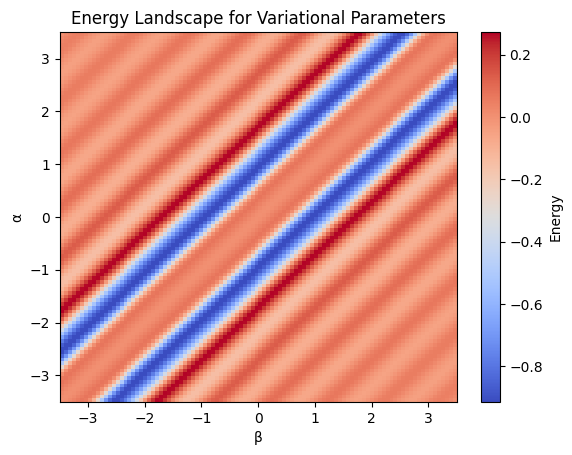

In [ ]:
alphas = np.linspace(-3.5, 3.5, 100)
betas = np.linspace(-3.5, 3.5, 100)

e_vals = E_functional(alphas, betas, theta)
e_array = np.array(e_vals).reshape(len(alphas), len(betas))

# Find the index of minimum energy
min_idx = np.unravel_index(np.argmin(e_array), e_array.shape)

# Get the corresponding alpha and beta values
alpha_min = alphas[min_idx[0]]
beta_min = betas[min_idx[1]]
min_energy = e_array[min_idx]

plt.imshow(e_array, extent=[betas[0], betas[-1], alphas[0], alphas[-1]],
           origin='lower', aspect='auto', cmap='coolwarm')
plt.colorbar(label='Energy')
plt.xlabel('β')
plt.ylabel('α')
plt.title('Energy Landscape for Variational Parameters')
plt.show()

## Interactive Plot to See Effects of Parameters on the Wavefunction

In [ ]:
# function of external magnetic field potential energy
# scaled down to better fit on plot
v_vals = -g * np.cos(theta) *1e-2

# ipywidget to change alpha and beta
def interactive_with_optimal():
    alpha_slider = widgets.FloatSlider(value=alpha_min, min=-3.5, max=3.5, step=0.1, description='α:')
    beta_slider = widgets.FloatSlider(value=beta_min, min=-3.5, max=3.5, step=0.1, description='β:')

    optimal_button = widgets.Button(description='Set to Optimal', button_style='success')

    def set_optimal(b):
        alpha_slider.value = alpha_min
        beta_slider.value = beta_min

    optimal_button.on_click(set_optimal)

    def plot_density(alpha, beta):
        wf = trial_wf(alpha, beta, theta)
        density = probability_density(wf, theta)
        energy = E_calc(wf, alpha, beta, theta)

        plt.plot(np.array(theta)/np.pi, density, 'b-', linewidth=2, label='Probability Density')
        plt.plot(np.array(theta)/np.pi, v_vals, 'r--', alpha=0.5, label='Potential')
        plt.xlabel('θ/π', fontsize=12)
        plt.ylabel('Probability Density', fontsize=12)
        plt.title(f'α={alpha:.2f}, β={beta:.2f}, E={energy:.6f}', fontsize=14)
        plt.legend()
        plt.tight_layout()
        plt.show()

    interactive_plot = widgets.interactive_output(plot_density, {'alpha': alpha_slider, 'beta': beta_slider})

    display(widgets.VBox([
        widgets.HBox([alpha_slider, beta_slider, optimal_button]),
        interactive_plot
    ]))

interactive_with_optimal()